<a href="https://colab.research.google.com/github/bamirandab/bike-sharing/blob/develop/notebooks/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import io

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import tensorflow as tf

In [4]:
ss_1 = StandardScaler()
ss_7 = StandardScaler()
vec = DictVectorizer()

In [5]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/bamirandab/bike-sharing/develop/data/train.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [6]:
df.dropna(axis=0, inplace=True)
dummies_columns = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
       
df[dummies_columns] = df[dummies_columns].astype(str)

In [7]:
ss_1.fit(df.cnt_1.values.reshape(-1,1))
ss_7.fit(df.cnt_7.values.reshape(-1,1))

df['cnt_1_ss'] = ss_1.transform(df.cnt_1.values.reshape(-1,1))
df['cnt_7_ss'] = ss_7.transform(df.cnt_7.values.reshape(-1,1))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16950 entries, 161 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      16950 non-null  object 
 1   yr          16950 non-null  int64  
 2   mnth        16950 non-null  object 
 3   hr          16950 non-null  object 
 4   holiday     16950 non-null  int64  
 5   weekday     16950 non-null  object 
 6   workingday  16950 non-null  int64  
 7   weathersit  16950 non-null  object 
 8   temp        16950 non-null  float64
 9   atemp       16950 non-null  float64
 10  hum         16950 non-null  float64
 11  windspeed   16950 non-null  float64
 12  cnt         16950 non-null  int64  
 13  cnt_7       16950 non-null  float64
 14  cnt_1       16950 non-null  float64
 15  cnt_1_ss    16950 non-null  float64
 16  cnt_7_ss    16950 non-null  float64
dtypes: float64(8), int64(4), object(5)
memory usage: 2.3+ MB


In [9]:
df_x = df.drop(['cnt', 'cnt_1_ss','cnt_7_ss', 'cnt_1','cnt_7'],axis =1).copy()
dict_data = df_x.apply(lambda x: {col: x[col] for col in df_x.columns}, axis=1)
X = vec.fit_transform(dict_data).toarray()

In [11]:
dict_data[161]

{'season': '1',
 'yr': 0,
 'mnth': '1',
 'hr': '0',
 'holiday': 0,
 'weekday': '6',
 'workingday': 0,
 'weathersit': '2',
 'temp': 0.18,
 'atemp': 0.197,
 'hum': 0.51,
 'windspeed': 0.1642}

In [12]:
y = df.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.1, random_state=42)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=X.shape[1]))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, epochs=100, batch_size=2**5, validation_data = (X_test, y_test))

Epoch 1/100
477/477 [==============================] - 9s 5ms/step - loss: 15027.6191 - mean_squared_error: 15027.6191 - val_loss: 3851.8076 - val_mean_squared_error: 3851.8076
Epoch 2/100
477/477 [==============================] - 2s 5ms/step - loss: 4513.6353 - mean_squared_error: 4513.6353 - val_loss: 2976.7351 - val_mean_squared_error: 2976.7351
Epoch 3/100
477/477 [==============================] - 3s 6ms/step - loss: 3923.7371 - mean_squared_error: 3923.7371 - val_loss: 2639.8679 - val_mean_squared_error: 2639.8679
Epoch 4/100
477/477 [==============================] - 2s 4ms/step - loss: 3625.3921 - mean_squared_error: 3625.3921 - val_loss: 2880.7197 - val_mean_squared_error: 2880.7197
Epoch 5/100
477/477 [==============================] - 2s 4ms/step - loss: 3438.5422 - mean_squared_error: 3438.5422 - val_loss: 2394.3728 - val_mean_squared_error: 2394.3728
Epoch 6/100
477/477 [==============================] - 2s 5ms/step - loss: 3174.3228 - mean_squared_error: 3174.3228 - val_

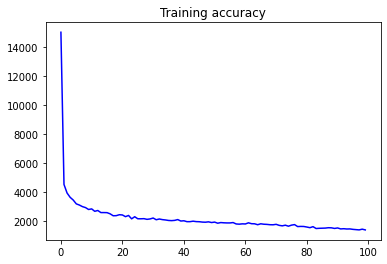

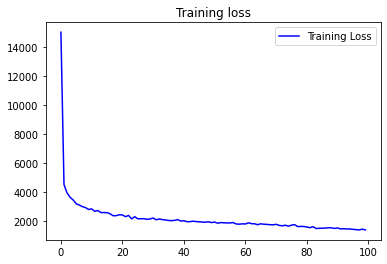

In [14]:
# Take a look at the training curves of your model
import matplotlib.pyplot as plt


acc = history.history['mean_squared_error']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
import pickle
from google.colab import files

with open('vect.pkl', 'wb') as f:
  pickle.dump(vec, f)

files.download('vect.pkl')

model.save('model.h5')

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>